# Blazed Gratings

In [1]:
import sys
import os
import numpy as np

# Get absolute path to the real src folder (repo root + src)
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, os.path.join(repo_root, "src"))

import fourieroptics as fo

## Create Grating

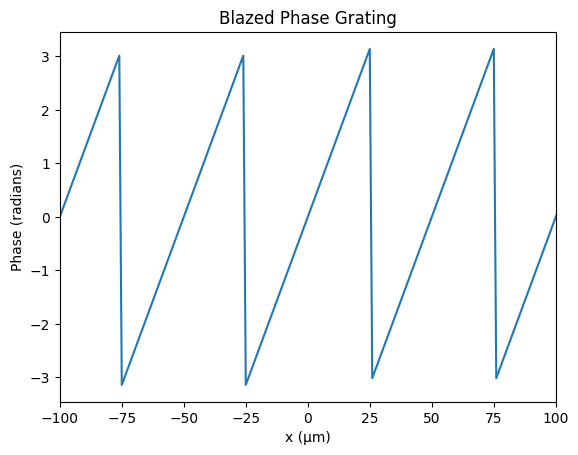

In [ ]:
N = 10000
dx = 1e-6
x = fo.coords_1D(N, dx)
period = 50e-6  # 50 microns
grating = fo.blazed_grating_1D(x, period)

# To visualize:
import matplotlib.pyplot as plt
plt.plot(x*1e6, grating)
plt.xlim(-100, 100)
plt.xlabel("x (µm)")
plt.ylabel("Phase (radians)")
plt.title("Blazed (Sawtooth) Phase Grating")
plt.show()

## Propagate through grating

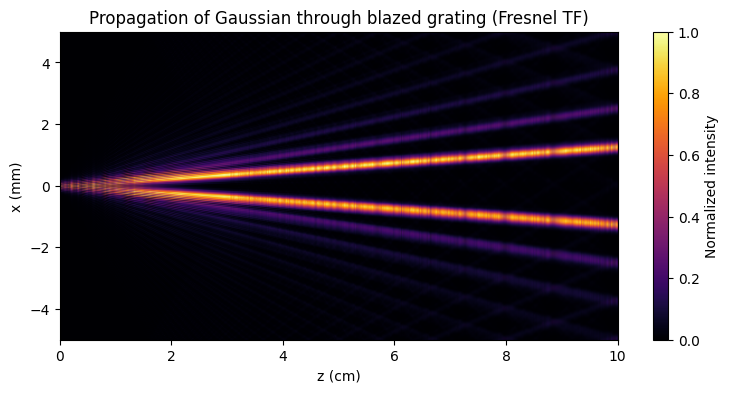

In [7]:
w0 = 200e-6        # waist of Gaussian

# Input Gaussian
E0 = fo.gaussian_beam_1D(x, w0)

z_final = 0.1  # Propagation distance in meters
wavelength = 633e-9  # Wavelength in meters (e.g., 633 nm for red light)
E0 = grating * E0  # Initial field is the grating phase profile

I_map, z_vals = fo.z_step_1D(E0, x, fo.fresnel_tf_1D, wavelength, z_final)

# Plot z-step intensity evolution
plt.figure(figsize=(9,4))
plt.imshow(I_map,
           extent=[z_vals[0]*100, z_vals[-1]*100, x[0]*1e3, x[-1]*1e3],
           aspect='auto', origin='lower', cmap='inferno')
plt.xlabel("z (cm)")
plt.ylabel("x (mm)")
plt.title("Propagation of Gaussian through blazed grating (Fresnel TF)")
plt.colorbar(label="Normalized intensity")
plt.show()